In [1]:
import pandas as pd
import numpy as np
import itertools
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
#read the data from csv files (all contents under <p> tag)
df1 = pd.read_csv("Class_Health.csv", sep='\t')
df2 = pd.read_csv("Class_Business.csv", sep='\t')
df3 = pd.read_csv("Class_Science.csv", sep='\t')
df4 = pd.read_csv("Class_Entertainment.csv", sep='\t')

In [3]:
#df2.shape

(1029, 3)

In [4]:
#set index
df1 = df1.set_index("Unnamed: 0")
df2 = df2.set_index("Unnamed: 0")
df3 = df3.set_index("Unnamed: 0")
df4 = df4.set_index("Unnamed: 0")

In [5]:
#df4.head()

In [6]:
# merge the 4 classes of instances together
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [7]:
#Shuffle
df = df.sample(frac=1)

In [8]:
#drop the instances which has NAN type of value
df = df.dropna() 

In [9]:
#Set 'y'
y = df.label 

# Drop the `label` column
#df.drop("label", axis=1)

In [10]:
y.head()

1928         Business
1175         Business
2905          Science
3626    Entertainment
267            Health
Name: label, dtype: object

In [11]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['content'], y, test_size=0.33, random_state=53)

In [12]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)#values.astype('U')) 
tfidf_test = tfidf_vectorizer.transform(X_test)#.values.astype('U'))

tfidf_vectorizer.get_feature_names()[-10:]

['本页面5秒之后将带您回到新华网首页',
 '沪公网安备',
 '湊和諧',
 '爲了您的學業和身心健康請不要沉迷於成人內容',
 '莫違法',
 '重健康',
 '防艾滋',
 'ｃｏ',
 'ｏｂｓ',
 'ｏｏｂｊ']

In [13]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,000000,0000ff,0003,000490,000apartments,000bpd,000houses,...,本页面5秒之后将带您回到新华网首页,沪公网安备,湊和諧,爲了您的學業和身心健康請不要沉迷於成人內容,莫違法,重健康,防艾滋,ｃｏ,ｏｂｓ,ｏｏｂｊ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# definition of function plot_confutsion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
#definition of function which will plot the bar chart of the accuracy for each class with total involved
def plot_bar_chart(array1, array2):
    n_groups = 5
    score = array1
    score_body = array2
 
    #create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
 
    rects1 = plt.bar(index, array1, bar_width,
                     alpha=opacity,
                     color='b',
                     label='<p>')
 
    rects2 = plt.bar(index + bar_width, score_body, bar_width,
                     alpha=opacity,
                     color='g',
                     label='<body>')
 
    plt.xlabel('Categories')
    plt.ylabel('Scores of accuracy')
    plt.title('Scores by each class and total')
    plt.xticks(index + bar_width, ('Business', 'Health', 'Science', 'Entertainment', 'Total'))
    plt.legend()
 
    plt.tight_layout()
    plt.show()

In [16]:
# Classifier of Naive Bayes
clf = MultinomialNB() 

accuracy:   0.834
[ 0.85207101  0.80060423  0.78041543  0.90764331  0.83409091]
Confusion matrix, without normalization


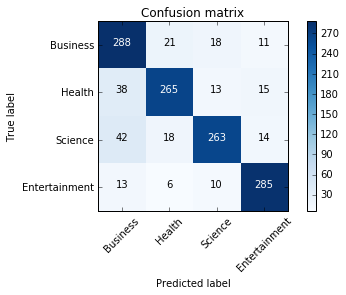

In [17]:
# Classification of Naive Bayes and list the accuracy, and plot the confusion matrix
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_NB = np.append(score_each_class, score)
print(score_NB)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

In [18]:
#print(df['label'].value_counts())

In [20]:
# Linear Support Vector Classifier
svmclf = svm.LinearSVC()

accuracy:   0.845
[ 0.86094675  0.81570997  0.79821958  0.91082803  0.84545455]
Confusion matrix, without normalization


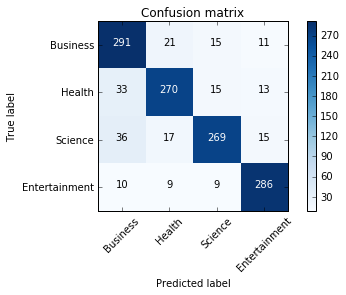

In [21]:
# Classification of LinearSVC and list the accuracy, plot the confusion matrix
svmclf.fit(tfidf_train, y_train)
pred = svmclf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_SVM = np.append(score_each_class, score)
print(score_SVM)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

In [22]:
#Decision Tree Classifier
DTclf = tree.DecisionTreeClassifier()

accuracy:   0.739
[ 0.73668639  0.70090634  0.70029674  0.82165605  0.73863636]
Confusion matrix, without normalization


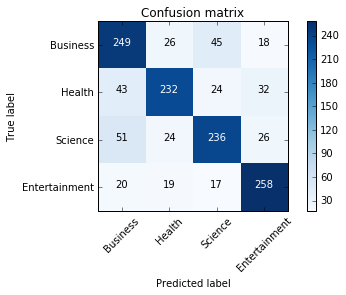

In [23]:
# Classification of DT and list the accuracy, plot the confusion matrix
DTclf.fit(tfidf_train, y_train)
pred = DTclf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_DT = np.append(score_each_class, score)
print(score_DT)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

In [24]:
#read the data from csv files (all contents under <body> tag)
df5 = pd.read_csv("Class_Health<Body>.csv", sep='\t')

In [25]:
df6 = pd.read_csv("Class_Business<Body>.csv", sep='\t')

In [26]:
df7 = pd.read_csv("Class_Science<Body>.csv", sep='\t')

In [27]:
df8 = pd.read_csv("Class_Entertainment<Body>.csv", sep='\t')

In [28]:
df8.head()

,Unnamed: 0,content,label
0,0,[<script>/*<![CDATA[*/window.fbAsyncInit=funct...,Entertainment
1,1,[<h1>403 - Forbidden</h1>],Entertainment
2,2,"[<iframe id=""gaIframe"" src=""//content.incapsul...",Entertainment
3,3,"[<script src=""/shared-content/art/stats/common...",Entertainment
4,4,"[<div id=""skip"">\n<a href=""#main-menu"">Jump to...",Entertainment


In [29]:
df5 = df5.set_index("Unnamed: 0")
df6 = df6.set_index("Unnamed: 0")
df7 = df7.set_index("Unnamed: 0")
df8 = df8.set_index("Unnamed: 0")

In [30]:
# merge instances together
df_body = pd.concat([df5, df6, df7, df8], ignore_index=True)

In [31]:
# Shuffle
df_body = df_body.sample(frac=1)

In [32]:
# drop NAN value
df_body = df_body.dropna() 

In [33]:
#Set y
y = df_body.label 
y.head()

3935    Entertainment
515            Health
646            Health
3642    Entertainment
3662    Entertainment
Name: label, dtype: object

In [35]:
#Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_body['content'], y, test_size=0.33, random_state=53)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)#values.astype('U')) 
tfidf_test = tfidf_vectorizer.transform(X_test)#.values.astype('U'))

#tfidf_vectorizer.get_feature_names()[-10:]

In [36]:
#Check the features 
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,00000,000000,0000000,00000000,000000000000,00000000000000000xh,000000000000_w33_r1,...,제휴안내,조선어,카카오스토리,카카오스토리로,트위터,트위터로,페이스북,페이스북으로,한국,한국어
0,0.022834,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020911,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005552,0.001202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Naive Bayes classifier
clf = MultinomialNB() 

accuracy:   0.623
[ 0.58103976  0.61377246  0.53644315  0.76898734  0.62272727]
Confusion matrix, without normalization


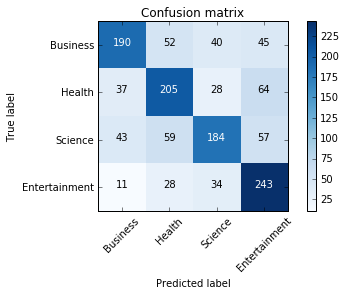

In [38]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_NB_body = np.append(score_each_class, score)
print(score_NB_body)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

accuracy:   0.697
[ 0.70642202  0.69461078  0.63265306  0.75949367  0.6969697 ]
Confusion matrix, without normalization


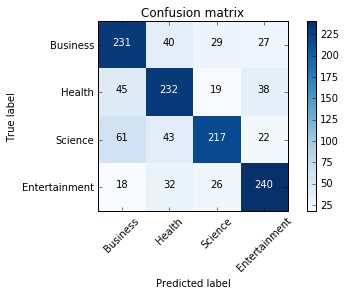

In [40]:
#Linear SVC 
svmclf = svm.LinearSVC()
svmclf.fit(tfidf_train, y_train)
pred = svmclf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_SVM_body = np.append(score_each_class, score)
print(score_SVM_body)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

accuracy:   0.640
[ 0.62996942  0.65868263  0.57725948  0.69936709  0.64015152]
Confusion matrix, without normalization


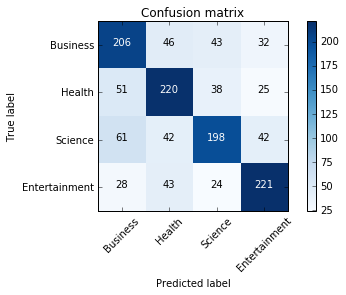

In [41]:
# Decision Tree
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(tfidf_train, y_train)
pred = DTclf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_DT_body = np.append(score_each_class, score)
print(score_DT_body)
plot_confusion_matrix(cm, classes=['Business', 'Health', 'Science', 'Entertainment'])

           Comparison by Naive Bayes classifier: 


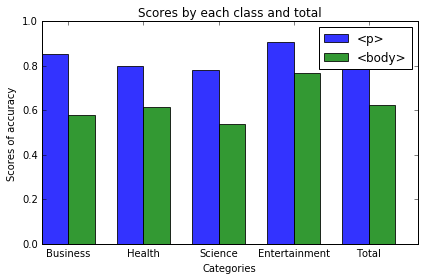

In [42]:
#Draw the bar chart and compare the results with data scraped by 2 ways (<p> and <body>)
print("           Comparison by Naive Bayes classifier: ")
plot_bar_chart(score_NB, score_NB_body)

           Comparison by Support Vector Machine classifier: 


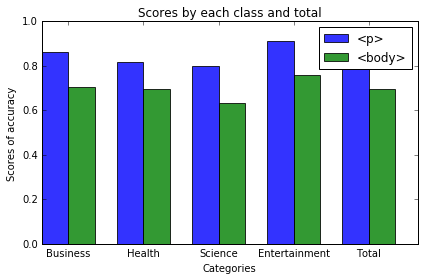

In [43]:
print("           Comparison by Support Vector Machine classifier: ")
plot_bar_chart(score_SVM, score_SVM_body)

           Comparison by Decision Tree classifier: 


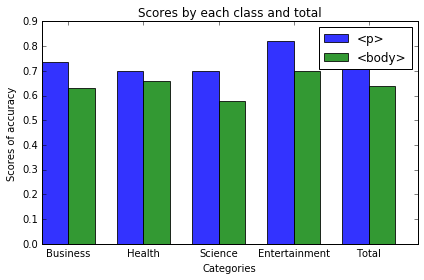

In [44]:
print("           Comparison by Decision Tree classifier: ")
plot_bar_chart(score_DT, score_DT_body)